In [2]:
setwd("~/Documents/DE/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(MASS)

Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”Loading required package: nlme
Loading required package: tidyr
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”Loading required package: MASS


In [53]:
data=read.csv("IR_test.csv")

In [54]:
data$Time=paste("T", data$Time, sep="_")

In [55]:
data$Time

[1] "T_24" "T_24" "T_24" "T_24" "T_24" "T_24" "T_0"  "T_0"  "T_0"  "T_0" 
[11] "T_0"  "T_0"  "T_6"  "T_6"  "T_6"  "T_6"  "T_6"  "T_6"

In [74]:
data$Time=factor(as.character(data$Time), level=c("T_0","T_6","T_24"))
data$Replicate=factor(as.character(data$Replicate)) 

In [89]:
data2=pivot_wider(data, names_from = Time, values_from = Cells)

In [90]:
data2=data2[c(3,5,6),]

In [91]:
data2$sixreduction=(data2$T_6-data2$T_0)/data2$T_0

In [109]:
data2$twentyfourreduction=((data2$T_24-data2$T_0)/data2$T_0)*100

In [110]:
as.data.frame(data2)

Replicate,T_24,T_0,T_6,sixreduction,twentyfourreduction
4,0,1081,608,-0.4375578,-100.00000
2,24,282,6,-0.9787234,-91.48936
1,26,140,5,-0.9642857,-81.42857


In [95]:
class(data2)

[1] "tbl_df"     "tbl"        "data.frame"

In [96]:
data2[,2:4]

T_24,T_0,T_6
0,1081,608
24,282,6
26,140,5


In [116]:
data3=pivot_longer(data2, cols=c(T_24, T_0, T_6), names_to="Time", values_to="Cells")

In [117]:
data3$Time=factor(as.character(data3$Time), level=c("T_0","T_6","T_24"))


In [118]:
head(data3)

Replicate,sixreduction,twentyfourreduction,Time,Cells
4,-0.4375578,-100.00000,T_24,0
4,-0.4375578,-100.00000,T_0,1081
4,-0.4375578,-100.00000,T_6,608
2,-0.9787234,-91.48936,T_24,24
2,-0.9787234,-91.48936,T_0,282
2,-0.9787234,-91.48936,T_6,6


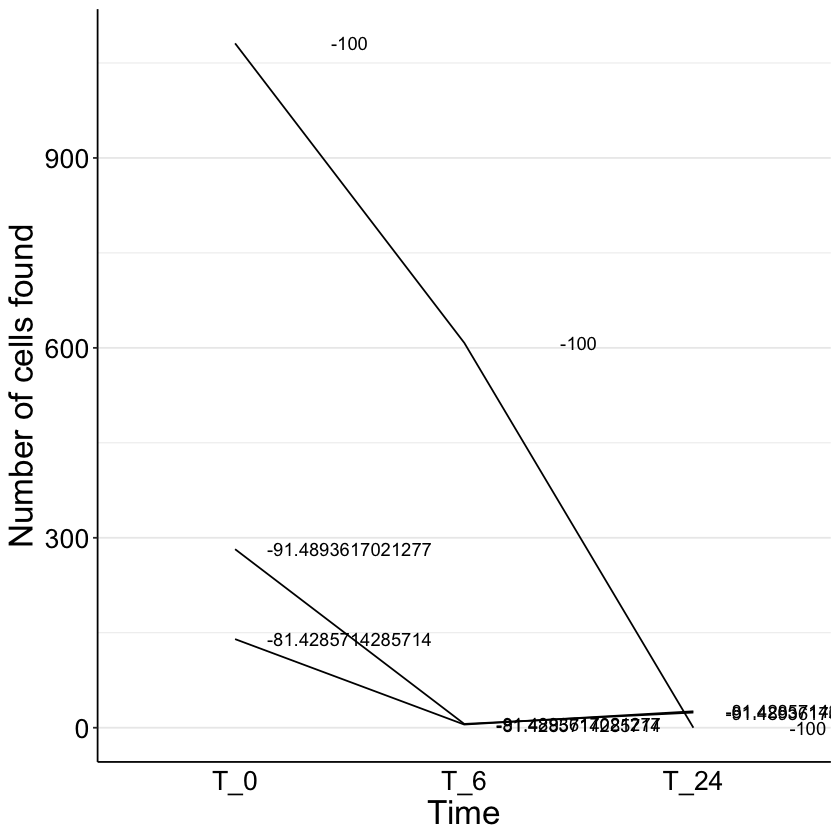

In [127]:
ggplot(data3, aes(x = Time, y = Cells,  group=Replicate, label=twentyfourreduction)) +
#scale_color_manual(values=c("darkred", "goldenrod", "darkblue", "darkgreen", "darkorange", "cornflowerblue"))+
#geom_point(size=5)+
       #geom_jitter(position=position_jitter(0.3))+
geom_line()+
geom_text(nudge_x=0.5)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Number of cells found")

In [128]:
ggsave(filename = "~/Documents/DE/Shed/IR_test.pdf" )

Saving 7 x 7 in image
